<a href="https://colab.research.google.com/github/ucmyk5391/207projects/blob/master/W207_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# W207 Final Project: Credit Card Fraud Detection
Farhan Quadri, Jiayi Ding, Monsoo Kim and Mahesh Nidhruva



### Objective

The objective of this project is to develop an effective and reliable model for detecting fraudulent transactions in credit card data. Using machine learning techniques, we aim to create a model that can accurately classify transactions as legitimate or fraudulent in real-time, helping financial institutions reduce the occurrence of credit card fraud. The model will be trained on features extracted from the dataset and optimized for high accuracy and minimal false positives, ensuring it can operate efficiently in a real-world, high-volume transaction environment.

### Motivation

Credit card fraud poses a growing challenge to the financial sector, with billions of dollars lost annually to fraudulent transactions. These activities disrupt the financial stability of individuals, erode consumer trust, and impose significant operational costs on institutions. The surge in online transactions and digital payment platforms has further heightened the need for advanced fraud detection systems capable of identifying suspicious activity in real time. This project seeks to address these challenges by building a data-driven solution that analyzes transaction patterns, detects anomalies, and reduces fraud. Beyond safeguarding financial resources, this initiative also aligns with broader goals of improving customer satisfaction and reinforcing the reliability of digital payment systems.

### Data

The dataset used in this project is the Credit Card Fraud Detection Dataset (2023) from Kaggle. This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.

Key features:
1. id: Unique identifier for each transaction
2. V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
3. Amount: The transaction amount
4. Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)




## Import libraries

In [ ]:
# standard
import pandas as pd
import numpy as np
import random
import os

# tf and keras
import tensorflow as tf
from keras import models
from keras import layers

# sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from scipy import stats

# plots
import seaborn as sns
import matplotlib.pyplot as plt

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Data ingestion

The dataset used for this project contains a total of 568,630 rows and 31 features, representing a comprehensive collection of credit card transaction records. During the initial exploration phase, the data was examined for quality and completeness.

Key observations include:
1. No Duplicates: A thorough check confirmed that the dataset contains no duplicate records, ensuring that each row represents a unique transaction.
2. No Missing Values: The dataset is complete, with no null or missing values across all features. This eliminates the need for data imputation and allows for a seamless preprocessing pipeline.

This clean and well-structured dataset provides a solid foundation for further data analysis, feature engineering, and model development. By ensuring data integrity at the ingestion stage, the risk of introducing biases or inaccuracies during the modeling process is minimized.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/creditcard_2023.csv')

print('Shape of Data:', df.shape)
df.head()

Shape of Data: (568630, 31)


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
# Gather the summary information for each column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,568630.0,2.843145e+05,164149.486121,0.000000,142157.250000,284314.500000,426471.750000,568629.000000
V1,568630.0,-5.638058e-17,1.000001,-3.495584,-0.565286,-0.093638,0.832658,2.229046
V2,568630.0,-1.319545e-16,1.000001,-49.966572,-0.486678,-0.135894,0.343555,4.361865
V3,568630.0,-3.518788e-17,1.000001,-3.183760,-0.649299,0.000353,0.628538,14.125834
V4,568630.0,-2.879008e-17,1.000001,-4.951222,-0.656020,-0.073762,0.707005,3.201536
V5,568630.0,7.997245e-18,1.000001,-9.952786,-0.293496,0.081088,0.439737,42.716891
V6,568630.0,-3.958636e-17,1.000001,-21.111108,-0.445871,0.078718,0.497788,26.168402
V7,568630.0,-3.198898e-17,1.000001,-4.351839,-0.283533,0.233366,0.525955,217.873038
V8,568630.0,2.109273e-17,1.000001,-10.756342,-0.192257,-0.114524,0.047299,5.958040
V9,568630.0,3.998623e-17,1.000001,-3.751919,-0.568745,0.092526,0.559262,20.270062


In [ ]:
# Check missing value
df.isnull().sum()

,0
id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
# Check duplicate records
df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

1. Transaction Distribution

The Class variable, which indicates whether a transaction is legitimate (0) or fraudulent (1), is evenly distributed in the dataset. The 50/50 split between the two categories ensures the model can learn patterns for both classes effectively.

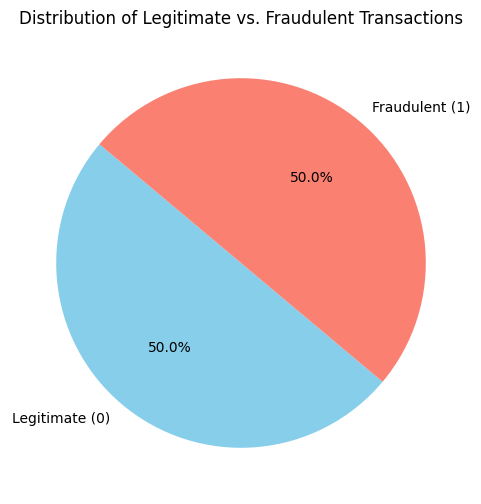

Count of Fraudulent Transactions: 284315
Count of Legitimate Transactions: 284315


In [ ]:
# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(df['Class'].value_counts(), labels=['Legitimate (0)', 'Fraudulent (1)'], autopct='%1.1f%%',
        startangle=140, colors=['skyblue', 'salmon'])
plt.title('Distribution of Legitimate vs. Fraudulent Transactions')
plt.show()

# Output the count for each categories
fraudulent_count = (df['Class']==1).sum()
legitimate_count = (df['Class']==0).sum()
print("Count of Fraudulent Transactions:", fraudulent_count)
print("Count of Legitimate Transactions:", legitimate_count)

2. Feature Correlation Matrix

To better understand the relationship between features and the target variable (Class), a correlation matrix was analyzed and visualized using a heatmap. This analysis highlights how strongly each feature correlates with the target variable and with one another.

From the heatmap, the following insights were observed:
1. The features V1, V3, V4, V6, V7, V9, V10, V11, V12, and V14 exhibit significant correlations with the Class variable.
2. V11 and V4 show a strong positive correlation with the target variable, meaning higher values of these features are associated with a higher likelihood of fraud.
3. The remaining features, including V1, V3, V6, V7, V9, V10, V12, and V14, exhibit a negative correlation, indicating that lower values of these features are associated with fraudulent transactions.

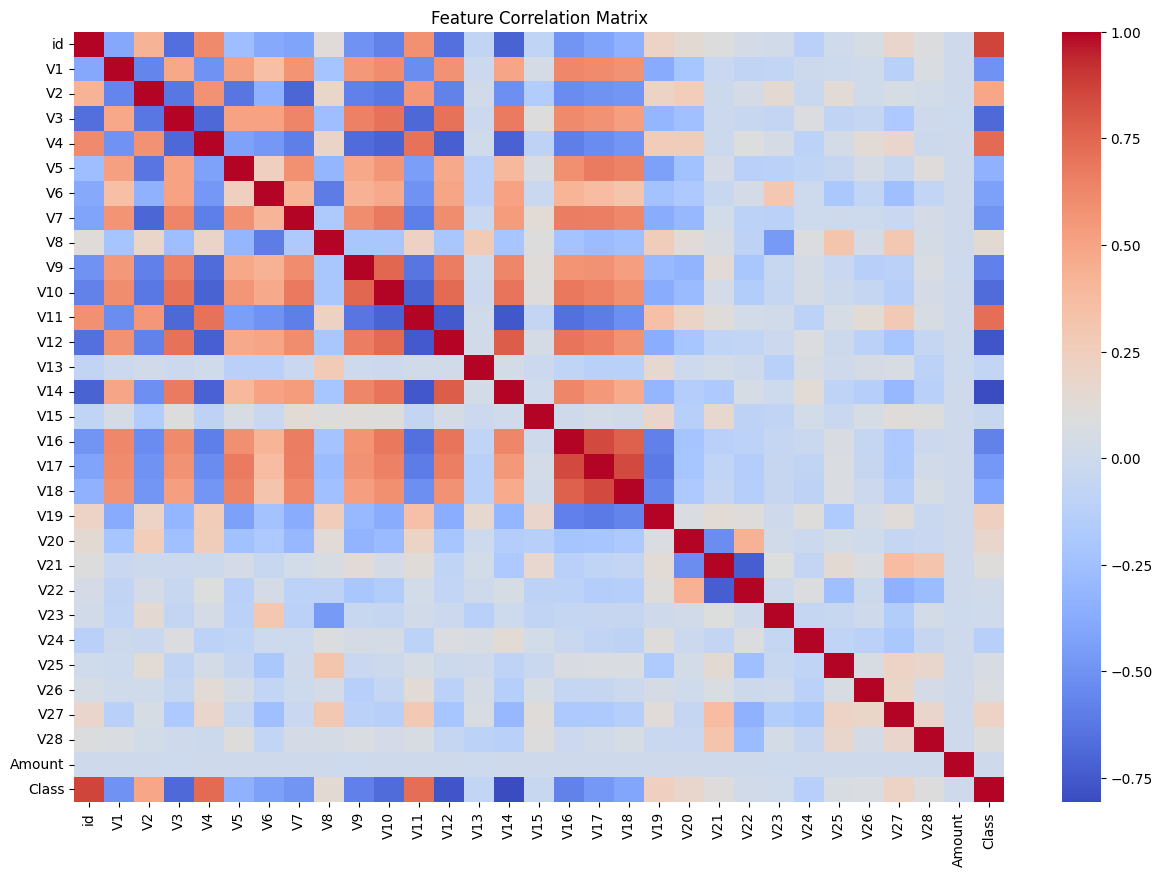

In [ ]:
# Plot correlations using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

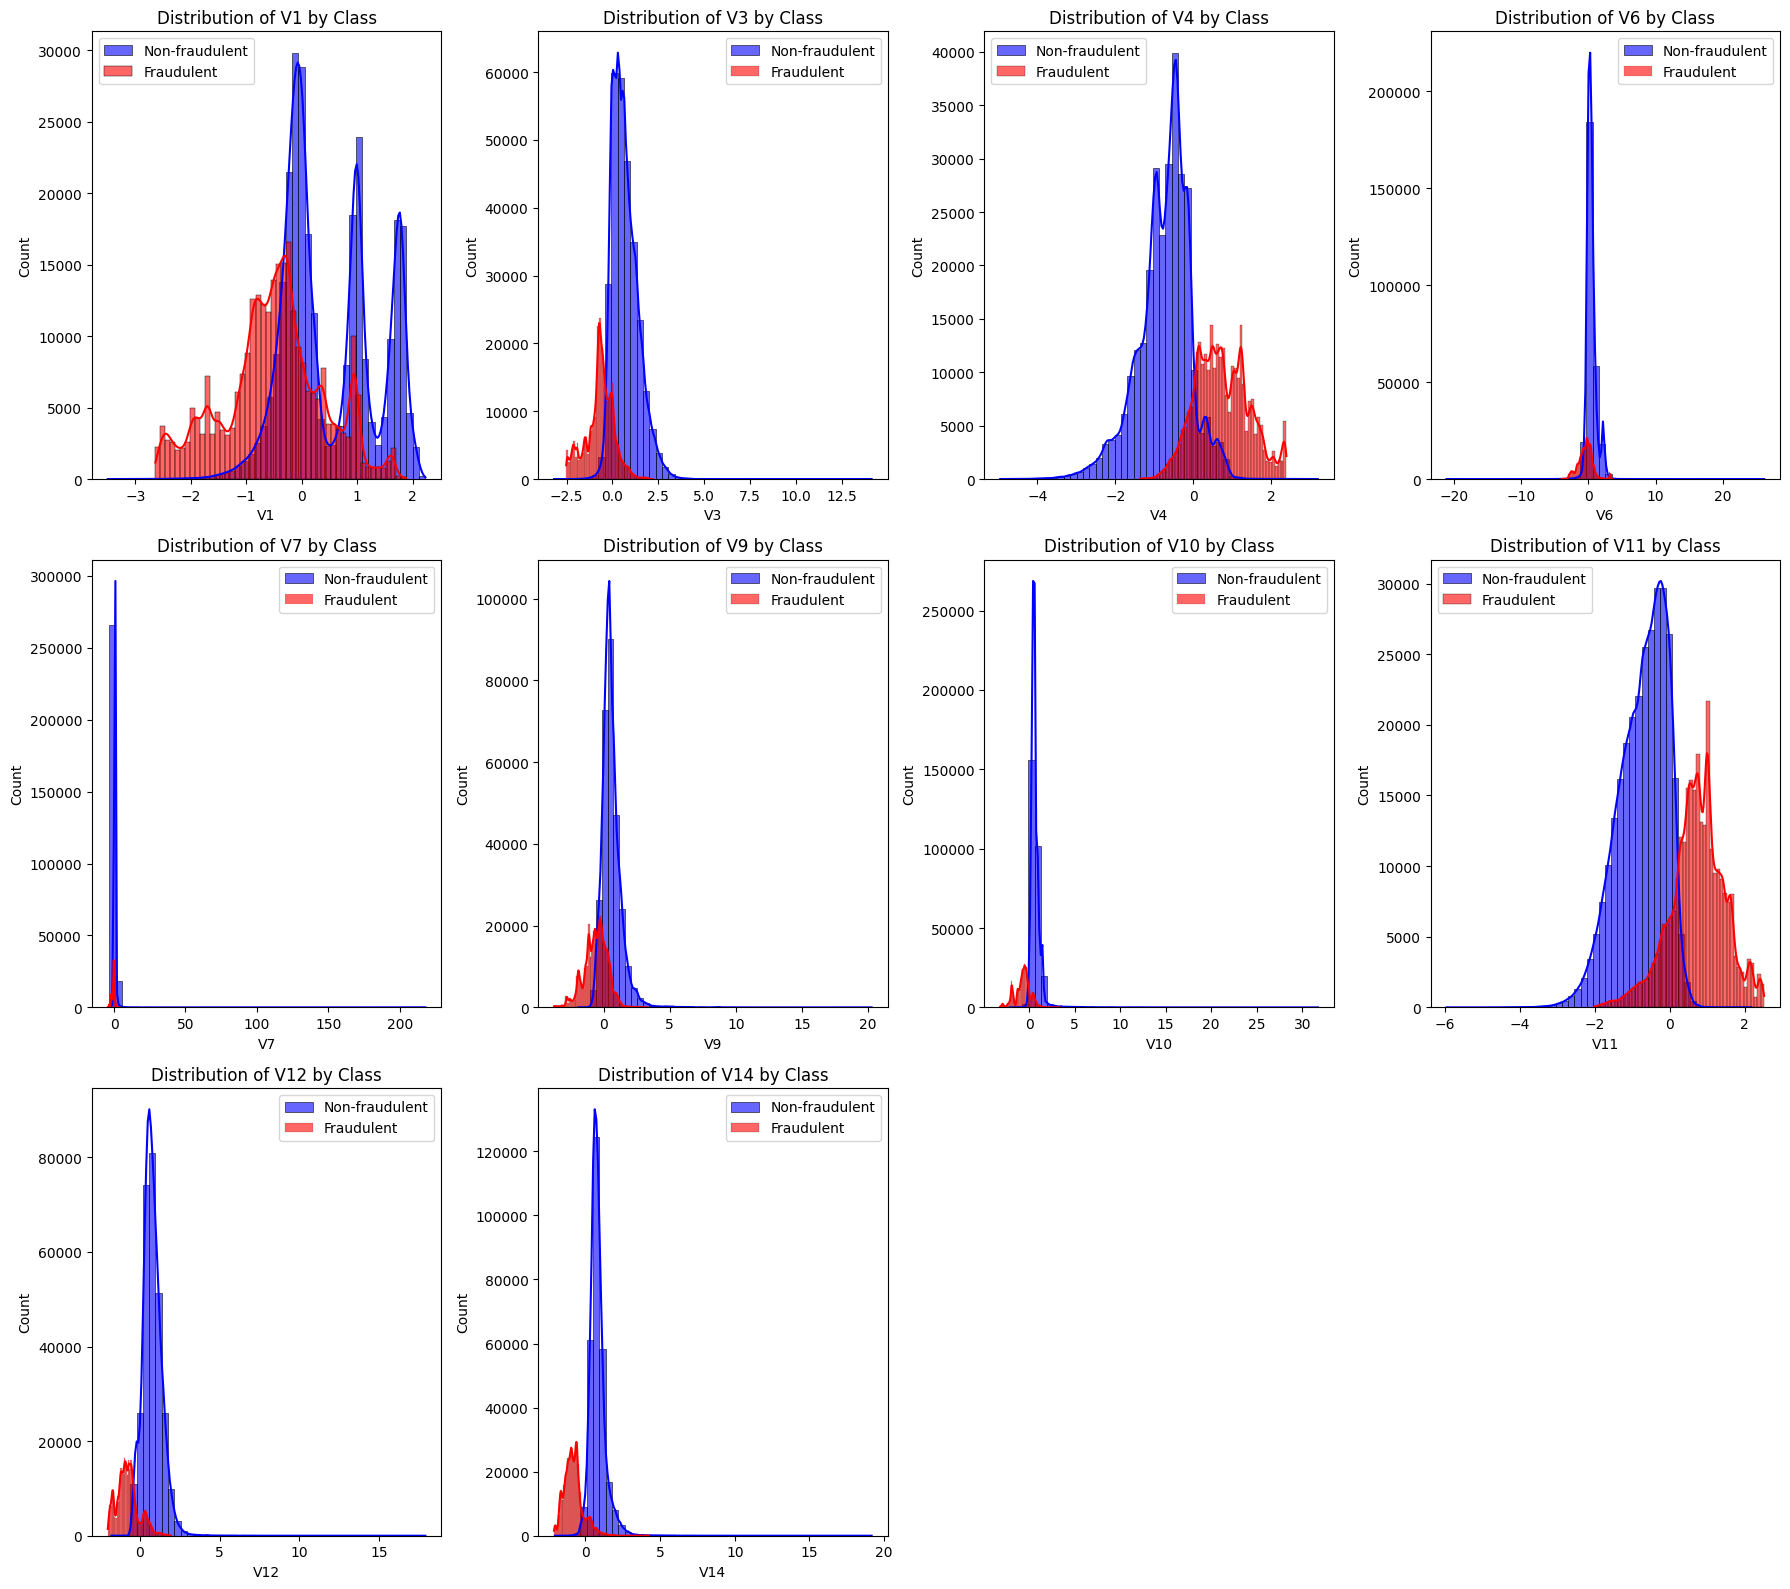

In [ ]:
# Visualize the distribution of features that have high/medium correlation with Class
features_to_plot = ['V1', 'V3', 'V4', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14']
plt.figure(figsize=(18, 16))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[df['Class'] == 0][feature], bins=50, color='blue', kde=True, label='Non-fraudulent', alpha=0.6)
    sns.histplot(df[df['Class'] == 1][feature], bins=50, color='red', kde=True, label='Fraudulent', alpha=0.6)
    plt.title(f'Distribution of {feature} by Class')
    plt.legend()

plt.tight_layout()
plt.show()

## Modeling

### Feature Selection

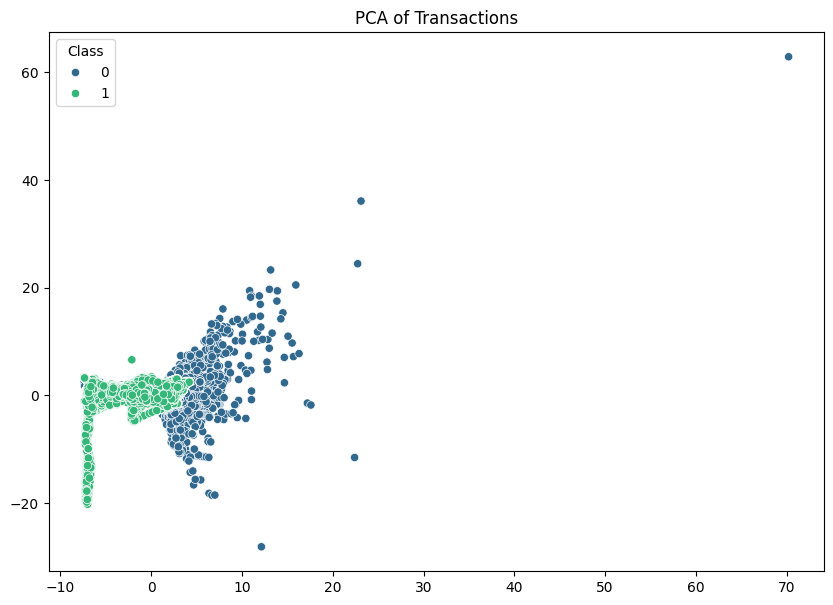

In [ ]:
# PCA for Dimensionality Reduction Visualization
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop(['Class', 'id'], axis=1))
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['Class'], palette='viridis')
plt.title("PCA of Transactions")
plt.show()

- Features V1, V3, and V11, the "Fraudulent" class has distinct peaks or spreads that are separate from the "Non-fraudulent" class, suggesting these features may be useful for distinguishing between fraudulent and non-fraudulent cases.
- Features with large overlaps in distributions (e.g., V10, V6, V7) might be less useful for classification, as it would be harder to differentiate between classes based on these features alone.
- Some features (like V7 and V10) are highly skewed, especially in the non-fraudulent class, with most values concentrated near zero. This suggests these features have a lot of low or zero values, especially in non-fraudulent cases.
- Since fraudulent transactions (in red) often have different distributions or distinct regions within the histograms, features like V1, V3, V4, and V11 may be particularly important for identifying fraudulent activity.

In [ ]:
# Selected features based on EDA analysis
selected_features = ['V1', 'V3', 'V4', 'V11', 'V12', 'V14']

### Data Split

To prepare the data for model training and evaluation, the dataset was partitioned into three subsets: training, validation, and test sets. The split was performed using the rule [60%, 20%, 20%]

In [ ]:
# Feature selection based on EDA findings
X = df[selected_features]
Y = df['Class']

# Split data into training and testing sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=1234)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=1234)

print("Shape of X training:", X_train.shape)
print("Shape of X validation:", X_val.shape)
print("Shape of X test:", X_test.shape)
print("Shape of Y training:", Y_train.shape)
print("Shape of Y validation:", Y_val.shape)
print("Shape of Y test:", Y_test.shape)

Shape of X training: (341178, 6)
Shape of X validation: (113726, 6)
Shape of X test: (113726, 6)
Shape of Y training: (341178,)
Shape of Y validation: (113726,)
Shape of Y test: (113726,)


### Data standardization

To assess the distribution and ensure uniform scaling across features, the quantile values (0.25, 0.5, 0.75, 0.95) for all selected features in X_train were calculated. Features are not uniformly scaled. Some features exhibit a wider range of values, while others show more concentrated distributions, which can lead to inconsistencies in model performance. Therefore, standardization was applied to ensure all features are on the same scale.

In [ ]:
# Compute quantile values for inspection
quantiles = [0.25, 0.5, 0.75, 0.95]
quantile_values = X_train.describe(percentiles=quantiles)

# Display quantile values for reference
print("\nQuantile Values for X_train:")
print(quantile_values.loc[['25%', '50%', '75%', '95%']])

# Check for uniform scaling using the Interquartile Range (IQR)
iqr = quantile_values.loc['75%'] - quantile_values.loc['25%']
iqr_consistency_ratio = iqr.max() / iqr.min()

# Output results
print("IQR consistency ratio: {:.2f}".format(iqr_consistency_ratio))
print("\nInterquartile Range (IQR) for each feature:")
print(iqr)



Quantile Values for X_train:
           V1        V3        V4       V11       V12       V14
25% -0.565587 -0.650046 -0.657117 -0.701757 -0.831353 -0.873874
50% -0.094311  0.000202 -0.074375 -0.041767  0.161136  0.230107
75%  0.830325  0.627991  0.709263  0.747934  0.743537  0.750665
95%  1.754345  1.655172  1.653352  1.620315  1.523030  1.414273
IQR consistency ratio: 1.27

Interquartile Range (IQR) for each feature:
V1     1.395912
V3     1.278037
V4     1.366380
V11    1.449691
V12    1.574889
V14    1.624539
dtype: float64


In [ ]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=selected_features, index=X_train.index)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=selected_features, index=X_val.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=selected_features, index=X_test.index)

print("\nScaled data sample (X_train_scaled):")
print(X_train_scaled.head())


Scaled data sample (X_train_scaled):
              V1        V3        V4       V11       V12       V14
406803 -0.875633 -0.419025  0.403810  0.542775 -0.776924 -0.580206
86292  -0.563339  1.639624 -0.881991 -1.898741  0.743092  0.223932
525823 -0.712674  0.733681  0.068887 -0.824723  0.630397  0.468979
474080  1.414952  0.012826  0.645222 -0.571461 -0.113903 -0.192675
90253   1.101815  0.619491 -1.375786 -0.659831  0.429309  0.510249


### Baseline Model: Logistic Regression

Logistic Regression serves as the starting point to classify fraudulent and non-fraudulent transactions based on the selected features. We use this model to establish a baseline for model performance and assess whether the features and dataset provide sufficient separability for classification.

1. The baseline Logistic Regression model demonstrates a high training accuracy of 98.13%, which indicates that it performs well on the training data. However, the test and validation accuracies are both around 95.6%.
2. The discrepancy between training and test/validation accuracies suggesting that the model may have limited generalization capability and the baseline model might not fully capture the underlying patterns in the data.

In [ ]:
# Train a baseline logistic regression model
base_model = LogisticRegression(random_state=1234)
base_model.fit(X_train_scaled, Y_train)

# Predict
Y_train_pred =  base_model.predict(X_train_scaled)
Y_val_pred = base_model.predict(X_val_scaled)
Y_test_pred = base_model.predict(X_test_scaled)

# Calculate the accuracy for each setting
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
val_accuracy = accuracy_score(Y_val, Y_val_pred)
print("Baseline Model: Logistic Regression")
print("Training Accuracy:",train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Validation Accuracy:", val_accuracy)

Baseline Model: Logistic Regression
Training Accuracy: 0.9559760594176647
Test Accuracy: 0.9564215746619067
Validation Accuracy: 0.9552520971457714


In [ ]:
# Get classification report on validation data
print("\nClassification Report (Test Set):")
print(classification_report(Y_val, Y_val_pred))


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56828
           1       0.98      0.93      0.95     56898

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



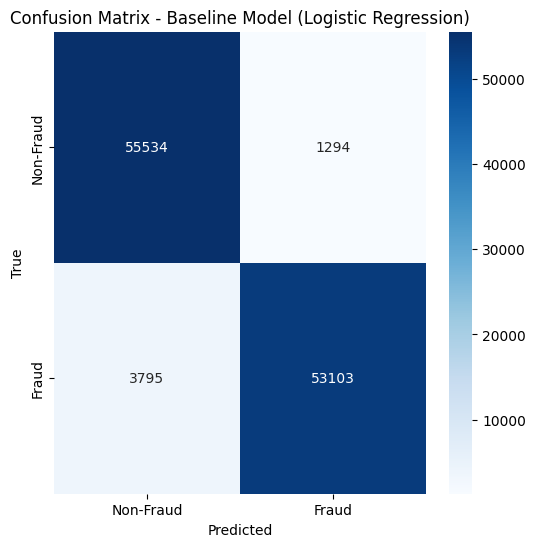

In [ ]:
# Confusion Matrix on validation data
conf_matrix = confusion_matrix(Y_val, Y_val_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix - Baseline Model (Logistic Regression)")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Improvement Model: RandomForest model

The Random Forest model is employed to improve classification performance by capturing non-linear relationships and interactions between features that Logistic Regression cannot handle. Its ensemble nature reduces the risk of overfitting, ensuring a more robust solution to the problem of detecting fraudulent transactions. Random Forest is particularly well-suited for this question because it can handle feature importance analysis, helping us understand which features contribute most to the predictions.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Improved Model: Random Forest (default hyperparameters)
improved_model_rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
improved_model_rf.fit(X_train_scaled, Y_train)

# Predictions
Y_train_pred =  improved_model_rf.predict(X_train_scaled)
Y_val_pred = improved_model_rf.predict(X_val_scaled)
Y_test_pred = improved_model_rf.predict(X_test_scaled)

# Calculate the accuracy for each set
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
val_accuracy = accuracy_score(Y_val, Y_val_pred)
print("Improved Model: Random Forest (Improved Hyperparameters)")
print("Training Accuracy (sklearn model):",train_accuracy)
print("Test Accuracy (sklearn model):", test_accuracy)
print("Validation Accuracy (sklearn model):", val_accuracy)

Improved Model: Random Forest (Improved Hyperparameters)
Training Accuracy (sklearn model): 0.9812766356564608
Test Accuracy (sklearn model): 0.9806816383236903
Validation Accuracy (sklearn model): 0.9801188822257003


In [ ]:
# Get classification report on validation data
print("\nClassification Report (Test Set):")
print(classification_report(Y_val, Y_val_pred))


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56828
           1       0.99      0.97      0.98     56898

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



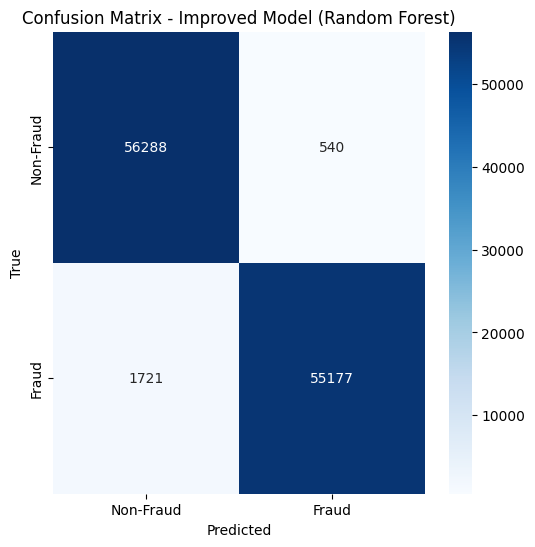

In [ ]:
# Confusion Matrix on validation data
conf_matrix = confusion_matrix(Y_val, Y_val_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix - Improved Model (Random Forest)")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report (Validation Data):")
print(classification_report(Y_val, Y_val_pred))


Classification Report (Validation Data):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56828
           1       0.99      0.97      0.98     56898

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



Based on the feature importance analysis, we detect that V14 was the most impactful features with an importance value of nearly 0.37. This high value indicates its significant contribution to the model's predictive power.

Feature Importances:
  Feature  Importance
5     V14    0.384269
4     V12    0.215982
2      V4    0.155671
3     V11    0.126029
1      V3    0.098175
0      V1    0.019873


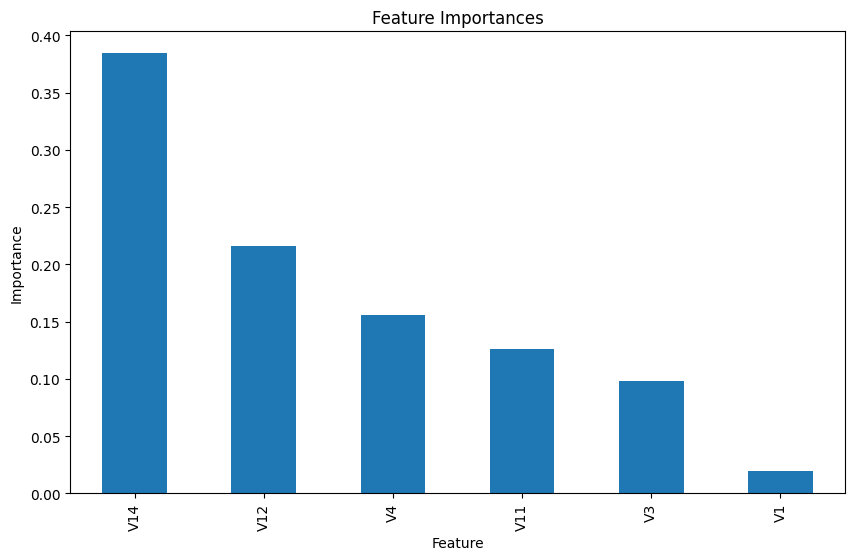

In [ ]:
import pandas as pd
import numpy as np

feature_importances = improved_model_rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': np.array(X_train_scaled.columns),
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

# Visualize
importance_df.plot(kind='bar', x='Feature', y='Importance', figsize=(10, 6), legend=False)
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()


### Neural Netwrok

### Single layer

Epoch 1/20
10662/10662 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.7444 - loss: 0.5226 - val_accuracy: 0.9547 - val_loss: 0.1183
Epoch 2/20
10662/10662 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9562 - loss: 0.1146 - val_accuracy: 0.9553 - val_loss: 0.1172
Epoch 3/20
10662/10662 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9557 - loss: 0.1154 - val_accuracy: 0.9554 - val_loss: 0.1173
Epoch 4/20
10662/10662 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9559 - loss: 0.1159 - val_accuracy: 0.9553 - val_loss: 0.1173
Epoch 5/20
10662/10662 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9567 - loss: 0.1132 - val_accuracy: 0.9554 - val_loss: 0.1173
Epoch 6/20
10662/10662 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.9558 - loss: 0.1156 - val_accuracy: 0.9555 - val_loss: 0.1173
Epoch 7/20
10662/10662 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9558 - loss: 0.1153 - val_accuracy: 0.9553 - val_loss: 0.1173
Epoch 8/20
10662/10662 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23 (96.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16 (68.00 B)

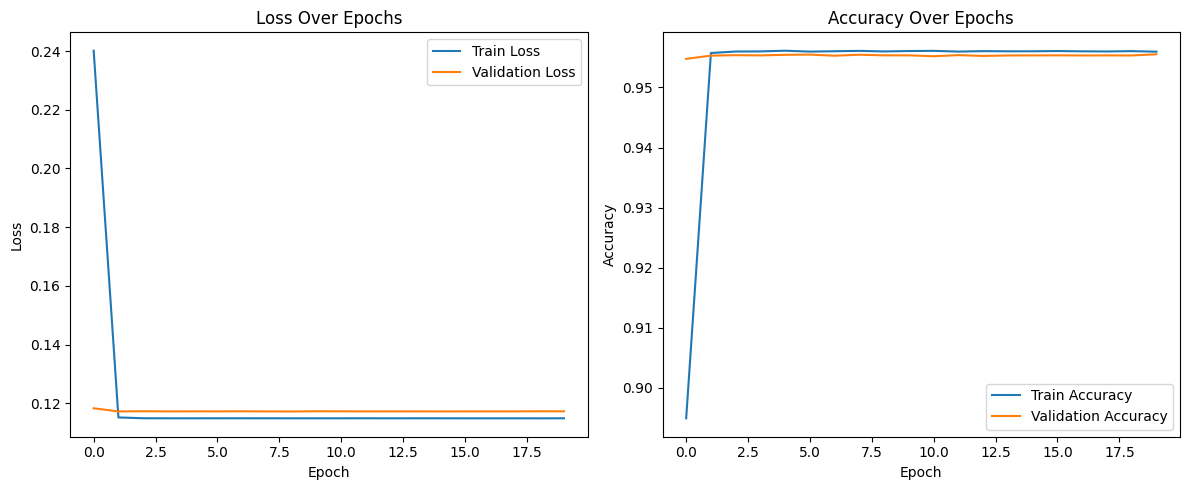

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import pandas as pd
import matplotlib.pyplot as plt

# Single-Layer Neural Network
tensorflow_model_single = models.Sequential([
    layers.Dense(1, activation='sigmoid', input_dim=X_train_scaled.shape[1])  # Single layer with sigmoid activation
])

# Compile the model
tensorflow_model_single.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and capture the training history
history_single = tensorflow_model_single.fit(
    X_train_scaled,
    Y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_scaled, Y_val)
)

# Display the model summary
tensorflow_model_single.summary()

# Convert the training history into a DataFrame
history_single_df = pd.DataFrame(history_single.history)

# Plot the training and validation loss and accuracy
def plot_history_single(history_df):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Plot loss
    axs[0].plot(history_df['loss'], label='Train Loss')
    axs[0].plot(history_df['val_loss'], label='Validation Loss')
    axs[0].set_title('Loss Over Epochs')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].legend()

    # Plot accuracy
    axs[1].plot(history_df['accuracy'], label='Train Accuracy')
    axs[1].plot(history_df['val_accuracy'], label='Validation Accuracy')
    axs[1].set_title('Accuracy Over Epochs')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

# Plot the training history for the single-layer model
plot_history_single(history_single_df)


### Multi-layer
Neural network was utilized for detecting fraudulent transactions and hyperparameter tuning is applied to find the best model. The architecture includes two hidden layers:
1. The first layer is a fully connected layer with 64 neurons and Rectified Linear Unit(ReLU) activations. It designed to process the input features and extract higher-level representations
2. The second layer is a dense layer with 32 neurons, further refining the features extracted by the first layer.

The final output layer employs a single neuron with sigmoid activation to produce a probability score for classification.


Epoch 1/20
10662/10662 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.9581 - loss: 0.1086 - val_accuracy: 0.9701 - val_loss: 0.0737
Epoch 2/20
10662/10662 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9734 - loss: 0.0661 - val_accuracy: 0.9778 - val_loss: 0.0560
Epoch 3/20
10662/10662 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.9790 - loss: 0.0536 - val_accuracy: 0.9818 - val_loss: 0.0480
Epoch 4/20
10662/10662 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.9817 - loss: 0.0470 - val_accuracy: 0.9821 - val_loss: 0.0443
Epoch 5/20
10662/10662 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.9834 - loss: 0.0429 - val_accuracy: 0.9836 - val_loss: 0.0445
Epoch 6/20
10662/10662 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9847 - loss: 0.0394 - val_accuracy: 0.9853 - val_loss: 0.0388
Epoch 7/20
10662/10662 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9863 - loss: 0.0362 - val_accuracy: 0.9836 - val_loss: 0.0412
Epoch 8/20
10662/10662 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,685 (30.02 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,124 (20.02 KB)

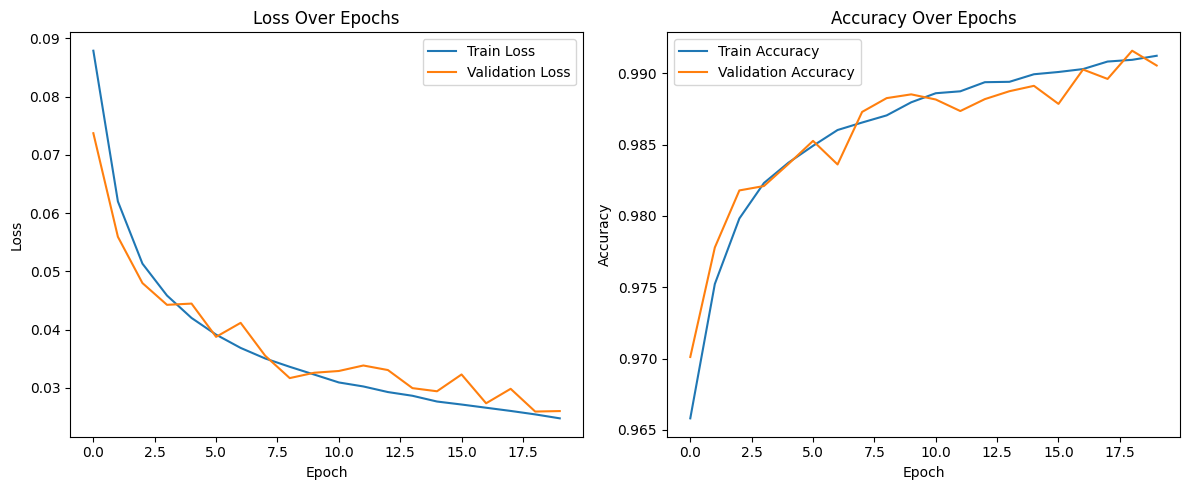

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers

# TensorFlow Model (Simple Neural Network)
tensorflow_model = models.Sequential([
    layers.Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
tensorflow_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and capture the training history
history = tensorflow_model.fit(
    X_train_scaled,
    Y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_scaled, Y_val)
)

# Display the model summary
tensorflow_model.summary()

# Convert the training history into a DataFrame
history_df = pd.DataFrame(history.history)

# Plot the training and validation loss and accuracy
def plot_history(history_df):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Plot loss
    axs[0].plot(history_df['loss'], label='Train Loss')
    axs[0].plot(history_df['val_loss'], label='Validation Loss')
    axs[0].set_title('Loss Over Epochs')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].legend()

    # Plot accuracy
    axs[1].plot(history_df['accuracy'], label='Train Accuracy')
    axs[1].plot(history_df['val_accuracy'], label='Validation Accuracy')
    axs[1].set_title('Accuracy Over Epochs')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_history(history_df)

In [ ]:
# Evaluate the model on the test and validation set
test_loss, test_accuracy = tensorflow_model.evaluate(X_test_scaled, Y_test)
val_loss, val_accuracy = tensorflow_model.evaluate(X_val_scaled, Y_val)
print("Improved Model: Random Forest (Improved Hyperparameters)")
print("Test Accuracy (TensorFlow Model):", test_accuracy)
print("Validation Accuracy (TensorFlow Model):", val_accuracy)

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9916 - loss: 0.0241
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9903 - loss: 0.0263
Improved Model: Random Forest (Improved Hyperparameters)
Test Accuracy (TensorFlow Model): 0.9912332892417908
Validation Accuracy (TensorFlow Model): 0.9905474781990051


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56828
           1       0.99      0.99      0.99     56898

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



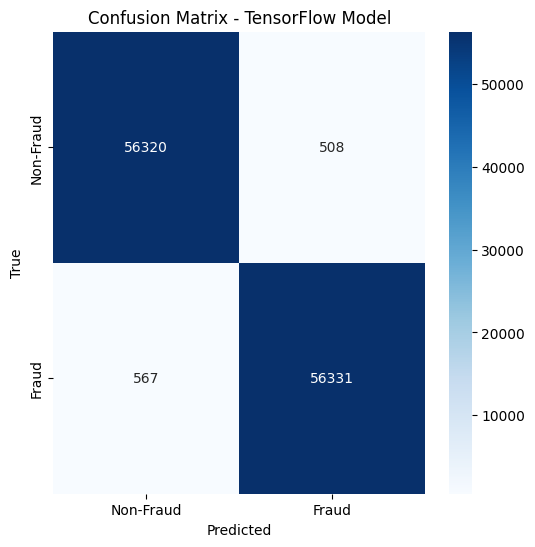

In [ ]:
# Predictions
Y_val_pred = (tensorflow_model.predict(X_val_scaled) > 0.5).astype('int')

# Get classification report on validation data
print("\nClassification Report (Test Set):")
print(classification_report(Y_val, Y_val_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_val, Y_val_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix - TensorFlow Model")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Hyperparameter tuning

In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [ ]:
import keras_tuner
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam

# Define the model with a slightly larger search space
def build_model(hp):
    model = models.Sequential()
    model.add(layers.Dense(
        units=hp.Int('units_layer_1', min_value=32, max_value=128, step=32),
        activation='relu',
        input_dim=X_train_scaled.shape[1]
    ))
    model.add(layers.Dense(
        units=hp.Int('units_layer_2', min_value=16, max_value=64, step=16),
        activation='relu'
    ))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the tuner with intermediate trials
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Moderate number of trials
    executions_per_trial=1,
    directory='my_tuner',
    project_name='improved_tuning'
)

# Run the search with fewer epochs during tuning
tuner.search(
    X_train_scaled,
    Y_train,
    epochs=10,  # Moderate number of epochs
    validation_data=(X_val_scaled, Y_val),
    batch_size=32
)

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

# Build and train the best model with more epochs
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train_scaled,
    Y_train,
    epochs=20,  # Increase epochs for the best model
    batch_size=32,
    validation_data=(X_val_scaled, Y_val)
)

# Evaluate the final model
test_loss, test_accuracy = best_model.evaluate(X_test_scaled, Y_test)
print(f"Test Accuracy: {test_accuracy}")



Trial 10 Complete [00h 06m 00s]
val_accuracy: 0.987768828868866

Best val_accuracy So Far: 0.9920423030853271
Total elapsed time: 00h 59m 33s
Best hyperparameters: {'units_layer_1': 128, 'units_layer_2': 48, 'learning_rate': 0.001}
Epoch 1/20
10662/10662 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.9622 - loss: 0.1003 - val_accuracy: 0.9746 - val_loss: 0.0650
Epoch 2/20
10662/10662 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9774 - loss: 0.0574 - val_accuracy: 0.9827 - val_loss: 0.0450
Epoch 3/20
10662/10662 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9826 - loss: 0.0442 - val_accuracy: 0.9844 - val_loss: 0.0417
Epoch 4/20
10662/10662 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.9857 - loss: 0.0369 - val_accuracy: 0.9844 - val_loss: 0.0393
Epoch 5/20
10662/10662 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9874 - loss: 0.0343 - val_accuracy: 0.9841 - val_loss: 0.0421
Epoch 6/20
10662/10662 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.9886 - loss: 0.0307 - val_accura

## Conclusion

1. Effectiveness of Machine Learning:
Advanced models like Random Forest and Neural Networks outperform traditional rule-based systems and baseline logistic regression for fraud detection.
2. Real-Time Application:
The models demonstrate potential for real-time fraud detection with high accuracy and minimal latency.
3. Impact:
These models can significantly reduce financial losses and operational costs for financial institutions while improving customer trust.


In [ ]:
!cat /proc/cpuinfo | grep 'model name' | uniq
!cat /proc/meminfo | grep 'MemTotal'

model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
MemTotal:       13290460 kB


In [ ]:
import os
if 'COLAB_TPU_ADDR' in os.environ:
    print("TPU is available")
else:
    print("TPU is not available")

TPU is not available


In [ ]:
import os
print("Running in Colab environment:", 'COLAB_GPU' in os.environ)

Running in Colab environment: True
